In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
lo_train = pd.read_excel('loan_train.xlsx')

In [3]:
lo_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


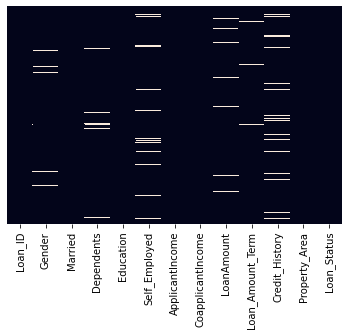

In [4]:
sns.heatmap(lo_train.isnull(),yticklabels=False,cbar=False)

In [5]:
lo_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
lo_train['Gender'].fillna('Male',inplace=True)

In [7]:
lo_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
lo_train['Married'].fillna('No',inplace=True)

In [9]:
lo_train['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
lo_train['Dependents'].fillna(0,inplace=True)

In [11]:
lo_train['Dependents'].replace('3+',4,inplace=True)

In [12]:
lo_train['Dependents'].unique()

array([0, 1, 2, 4], dtype=int64)

In [13]:
lo_train['Self_Employed'].fillna("No",inplace=True)

In [14]:
n_nat = lo_train['Loan_Amount_Term'].dropna()
n_lat = np.average(n_nat)

In [15]:
lo_train['Loan_Amount_Term'].fillna(n_lat,inplace=True)

In [16]:
n_na = lo_train['LoanAmount'].dropna()
n_la = np.average(n_na)

In [17]:
lo_train['LoanAmount'].fillna(n_la,inplace=True)
lo_train['Credit_History'].fillna(0,inplace=True)
lo_train['Credit_History'].unique()

array([1., 0.])

In [18]:
lo_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [19]:
lo_train['Property_Area'].replace('Urban',3,inplace=True)
lo_train['Property_Area'].replace('Rural',1,inplace=True)
lo_train['Property_Area'].replace('Semiurban',2,inplace=True)
lo_train['Property_Area'].unique()

array([3, 1, 2], dtype=int64)

In [20]:
lo_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


In [21]:
g_new = pd.get_dummies(lo_train['Gender'],drop_first=True)
m_new = pd.get_dummies(lo_train['Married'],drop_first=True)
e_new = pd.get_dummies(lo_train['Education'],drop_first=True)
s_new = pd.get_dummies(lo_train['Self_Employed'],drop_first=True)

In [22]:
lo_train.drop(['Gender','Married','Education','Self_Employed'],axis=1,inplace=True)

In [23]:
Loan_Status = lo_train['Loan_Status']

In [24]:
lo_train.drop('Loan_Status',axis=1,inplace=True)

In [25]:
lo_train = pd.concat([lo_train,g_new,m_new,e_new,s_new],axis=1)

In [26]:
lo_train['Loan_Status'] = Loan_Status

In [27]:
lo_train.rename(columns={'Male':'Gender','Yes':'Married','Not Graduate':'Education','Yes':'Self_Employed'},inplace=True)

In [28]:
lo_train.head(3)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Self_Employed,Education,Self_Employed,Loan_Status
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,3,1,0,0,0,Y
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,N
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,3,1,1,0,1,Y


In [29]:
X = lo_train.drop(['Loan_ID','Loan_Status'],axis=1)

In [30]:
y = lo_train['Loan_Status']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
Rfc = RandomForestClassifier()

In [35]:
Rfc.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
RandomForestClassifier()

RandomForestClassifier()

In [37]:
Rfc.score(X_test,y_test)

0.772972972972973